In [ ]:
import numpy as np 
import pandas as pd 
import cv2
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
from glob import glob

from keras.models import *
from keras.layers import *
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.activations import *

In [ ]:
model = load_model('/content/drive/MyDrive/ZahidVai/Lung Segmentation/Better_Segment_Model.h5')

In [ ]:
img_shape = (256,256)
def transform_img(img):
  img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  reshape_img = cv2.resize(img_gray,img_shape)
  return reshape_img/255.0

In [ ]:
train_cov_dir = '/content/drive/MyDrive/ZahidVai/Covid_dataset/train/COVID19/'
train_nor_dir = '/content/drive/MyDrive/ZahidVai/Covid_dataset/train/NORMAL/'

test_cov_dir = '/content/drive/MyDrive/ZahidVai/Covid_dataset/test/covid/'
test_nor_dir = '/content/drive/MyDrive/ZahidVai/Covid_dataset/test/normal/'

train_cov_dir_glob = '/content/drive/MyDrive/ZahidVai/Covid_dataset/train/COVID19/*'
train_nor_dir_glob = '/content/drive/MyDrive/ZahidVai/Covid_dataset/train/NORMAL/*'

train_cov_img = glob(train_cov_dir_glob)
train_nor_img = glob(train_nor_dir_glob)

In [ ]:
len(train_cov_img),len(train_nor_img)

(576, 1583)

In [ ]:
def add_mask(img,mask):
  _ , mask = cv2.threshold(mask ,0.3,1,cv2.THRESH_BINARY)
  merged = cv2.addWeighted(img, 0.7, mask.astype(np.float64), 0.3, 0)
  return merged

In [ ]:
from tensorflow.python.platform.tf_logging import error
def LungSegment(temp_img,p_ath,kernel = np.ones((5, 5),np.uint8)):
  size = len(temp_img)
  temp = np.array(temp_img)
  for i in range(size):
    img = cv2.imread(temp[i])
    img = transform_img(img)

    mask = model.predict(np.array([img]))
    mask_f = np.squeeze(mask[0])
    erode_img = cv2.erode(mask_f,kernel,iterations = 2)
    merged = add_mask(img,erode_img)
    name = f'{p_ath}{i}.jpg'
    plt.imshow(merged,cmap = 'gray')
    plt.savefig(name)


Segmentng lung from train covid

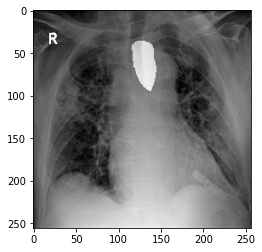

In [ ]:
cov_path = '/content/drive/MyDrive/ZahidVai/lungSegdataset/train/covid/'
LungSegment(train_cov_img,cov_path)

In [ ]:
nor_path = '/content/drive/MyDrive/ZahidVai/lungSegdataset/train/normal/'
LungSegment(train_nor_img,nor_path)

Test directory creation 

In [ ]:
test_cov_dir_glob = '/content/drive/MyDrive/ZahidVai/Covid_dataset/test/covid/*'
test_nor_dir_glob = '/content/drive/MyDrive/ZahidVai/Covid_dataset/test/normal/*'

In [ ]:
test_cov_img = glob(test_cov_dir_glob)
test_nor_img = glob(test_nor_dir_glob)

In [ ]:
len(test_cov_img),len(test_nor_img)

(69, 25)

In [ ]:
test_cov_path = '/content/drive/MyDrive/ZahidVai/lungSegdataset/test/covid/'
test_nor_path = '/content/drive/MyDrive/ZahidVai/lungSegdataset/test/normal/'

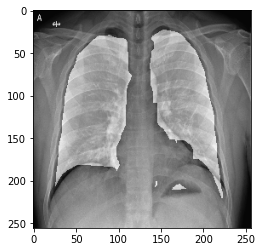

In [ ]:
LungSegment(test_cov_img,test_cov_path)

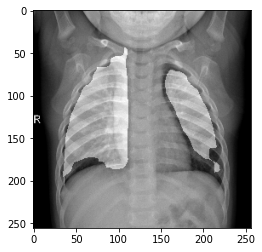

In [ ]:
LungSegment(test_nor_img,test_nor_path)